# Generation of Figures and Statistics

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
# Load spacy model
import spacy
spacy_model='de_core_news_lg'
nlp_sent = spacy.load(spacy_model, exclude=['tagger', 'morphologizer', 'parser',
                                                         'attribute_ruler', 'lemmatizer'])
nlp_sent.add_pipe("sentencizer")

In [4]:
# Define functions

# Get number of tokens
def get_tokens(x):
    tokens = [token.text for token in x] 
    return len(tokens)

# Get number of sentences
def get_sentences(x):
    sentences = [[token.text for token in sent] for sent in x.sents]
    return len(sentences)

In [145]:
nccr_df = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Output/NCCR_combined_corpus_DE_wording_available_prep.csv')

In [146]:
# Prepare dfs
nccr_df['doc_text'] = list(nlp_sent.pipe(nccr_df['text_prep']))
nccr_df['doc_segment'] = list(nlp_sent.pipe(nccr_df['wording_segments']))

nccr_df['text_tokens'] = nccr_df['doc_text'].apply(lambda x: get_tokens(x))
nccr_df['segment_tokens'] = nccr_df['doc_segment'].apply(lambda x: get_tokens(x))

nccr_df['text_sents'] = nccr_df['doc_text'].apply(lambda x: get_sentences(x))
nccr_df['segment_sents'] = nccr_df['doc_segment'].apply(lambda x:get_sentences(x))



In [6]:
bt_df = pd.read_csv('C:/Users/dschw/Documents/GitHub/Thesis/Output/BT_corpus_prep.csv')

In [7]:
bt_df['doc_text'] = list(nlp_sent.pipe(bt_df['paragraph']))

bt_df['text_tokens'] = bt_df['doc_text'].apply(lambda x: get_tokens(x))
bt_df['text_sents'] = bt_df['doc_text'].apply(lambda x: get_sentences(x))

# 1. NCCR

## Figures 

### Number of speeches per Country & Party

In [147]:
# Rename partys 
nccr_df["party"].replace({"fpo": "FPÖ",     
                          "ovp": "ÖVP",
                          "teamstronach": "Team Stronach",
                          "neos": "NEOS",
                          "spo": "SPÖ",
                          "bzo": "BZÖ",
                          "lif": "LIF",
                          "sp": "SP",
                          "gps": "GRÜNE Schweiz",  
                          "svp": "SVP",
                          "evp": "EVP",
                          "bdp": "BDP",
                          "cvp": "CVP",
                          "glp": "glp",
                          "edu": "EDU",
                           "ldu": "LdU",
                          "afd": "AfD",
                          "pds": "PDS",
                          "spd": "SPD",
                         "dielinke": "Die Linke",
                         "npd": "NPD",
                         "cdu/csu": "CDU/CSU"},                       
                         inplace=True)

# Rename parties present in multiple countries
nccr_df.loc[(nccr_df.Sample_Country == 'de') & (nccr_df.party == 'fdp') , 'party'] = "FDP"
nccr_df.loc[(nccr_df.Sample_Country == 'cd') & (nccr_df.party == 'fdp') , 'party'] = "FDP.Die Liberalen"
nccr_df.loc[(nccr_df.Sample_Country == 'de') & (nccr_df.party == 'grune') , 'party'] = "Bündnis 90/Die Grünen"
nccr_df.loc[(nccr_df.Sample_Country == 'au') & (nccr_df.party == 'grune') , 'party'] = "GRÜNE"
nccr_df.loc[(nccr_df.Sample_Country == 'cd') & (nccr_df.party == 'grune') , 'party'] = "GRÜNE Schweiz"

# drop nan
nccr_df.dropna(subset=['party'])

# Rename countries
nccr_df["Sample_Country"].replace({"au": "Austria",   
                         "cd": "Switzerland",
                        "de": "Germany"},                       
                         inplace=True)

nccr_df.sort_values(['Sample_Country', 'party'], inplace=True)
nccr_df.rename(columns={'Sample_Country': 'Country'}, inplace=True)


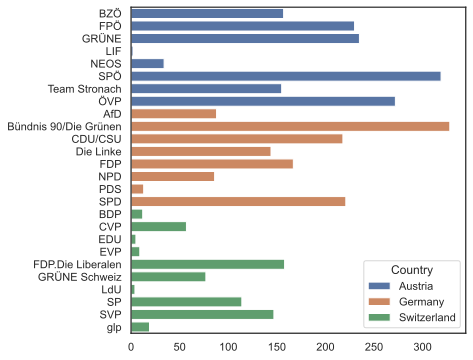

In [150]:
# Number of speeches per country & party
plt.figure(figsize=(6,6))

sns.countplot(y="party", hue='Country', data=nccr_df, dodge=False, palette="deep").set( xlabel='', ylabel='')
sns.set(font_scale = 2)
sns.set(rc = {'figure.figsize':(11,5)})
sns.set_style("white")

#plt.show()
plt.savefig('parties_nccr_df.svg')


## Stats

In [8]:
pd.set_option('display.max_columns', None)
nccr_df.describe()

,#TS,#TS2,Medium,Author,Author_ID,Length,TS_Beginning,TS_End,Images,Position,Genre,Frame_HI_face,Frame_HI_indi,Frame_HI_emoN,Frame_HI_emoP,Frame_Con_disa,Frame_Con_repr,Frame_Con_winn,Frame_Con_slant,Frame_PRF_conduit,Frame_PRF_context,Frame_PRF_interp,Frame_PRF_account,Frame_Neg_tone,Frame_Neg_scep,Frame_Neg_other,Count_Speaker,Count_Issues,Count_ActEval,STYLE_Negativ,STYLE_Emot,T_Brutto,T_Break,T_Netto,T_H,Sessiontext,Weight,Filter_Coded,STYLE_Colloquial,STYLE_Casual,STYLE_Facts,STYLE_Sense,STYLE_BlackWhite,STYLE_Sarcasm,STYLE_Drama,STYLE_EmoTone,STYLE_CommMan,STYLE_UsThem,STYLE_Privat,STYLE_Coll_pos,STYLE_Coll_neg,STYLE_Emph,POPULIST,POPULIST_PeopleCent,POPULIST_AntiElite,POPULIST_Sovereign,POPULIST_Advocative,POPULIST_Conflictive,ANTIPOPULIST,APOPULIST_PeopleCent,APOPULIST_AntiElite,APOPULIST_Sovereign,APOPULIST_Advocative,APOPULIST_Conflictive,LW_Attack,Migrants_Mentioned,Migrants_Neg,Migrants_Pos,Iss_Heartland,Iss_Migration,Iss_Labor,Iss_Social,Iss_Labreg_Pro,Iss_Labreg_Con,Iss_Labreg_Neut,Iss_Migres_Pro,Iss_Migres_Con,Iss_Migres_Neut,Spr_attacked,Spr_praised,Spr_agreed,Spr_disagreed,Spr_attacked_J,Spr_praised_J,Spr_agreed_J,Spr_disagreed_J,Iss_Pos_differ,Iss_Pos_contra,Iss_Pos_differ_J,Iss_Pos_contra_J,Tgt_differ,Tgt_differ_J,Challenged,Challenged_J,Usual_Suspect,On_Migration,On_Labor,AE_Total,PC_Total,RS_Total,AE_Emph,AE_Unchall,PC_Emph,PC_Unchall,RS_Emph,RS_Unchall,AE_Mig,AE_Mig_Emph,AE_Mig_Unchall,AE_Mig_Pro,AE_Mig_Con,PC_Mig,PC_Mig_Emph,PC_Mig_Unchall,PC_Mig_Pro,PC_Mig_Con,RS_Mig,RS_Mig_Emph,RS_Mig_Unchall,RS_Mig_Pro,RS_Mig_Con,Mig_Con,Mig_Con_Emph,Mig_Con_Unchall,Mig_Neut,Mig_Neut_Emph,Mig_Neut_Unchall,Mig_Pro,Mig_Pro_Emph,Mig_Pro_Unchall,AE_Lab,AE_Lab_Emph,AE_Lab_Unchall,PC_Lab,PC_Lab_Emph,PC_Lab_Unchall,RS_Lab,RS_Lab_Emph,RS_Lab_Unchall,Lab_Con,Lab_Con_Emph,Lab_Con_Unchall,Lab_Neut,Lab_Neut_Emph,Lab_Neut_Unchall,Lab_Pro,Lab_Pro_Emph,Lab_Pro_Unchall,POP_Total,POP_Unchall,POP_Emph,Spr_ID,year,match_count,Wording_sent_count,Unnamed: 0,ID_non,text_tokens,segment_tokens,text_sents,segment_sents
count,3.457000e+03,3.457000e+03,3457.000000,3457.000000,3457.000000,3457.000000,0.0,0.0,0.0,3457.000000,3457.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.0,3457.000000,3457.0,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.0,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,11.000000,11.000000,3457.000000,3457.000000,3457.000000,3457.000000
mean,1.426612e+09,1.426615e+09,2622.178768,2.000289,13780.890078,561.749205,NaN

In [9]:
len(nccr_df)

3457

In [10]:
print(len(nccr_df.loc[nccr_df.POPULIST == 1]))
print((len(nccr_df.loc[nccr_df.POPULIST == 1])/len(nccr_df))*100)
print(len(nccr_df.loc[nccr_df.POPULIST_PeopleCent == 1]))
print((len(nccr_df.loc[nccr_df.POPULIST_PeopleCent == 1])/len(nccr_df))*100)
print(len(nccr_df.loc[nccr_df.POPULIST_AntiElite == 1]))
print((len(nccr_df.loc[nccr_df.POPULIST_AntiElite == 1])/len(nccr_df))*100)
print(len(nccr_df.loc[nccr_df.POPULIST_Sovereign == 1]))
print((len(nccr_df.loc[nccr_df.POPULIST_Sovereign == 1])/len(nccr_df))*100)

1097
31.732716227943303
520
15.041943881978595
671
19.40989297078392
117
3.384437373445184


In [12]:
# Number of examples without party
len(nccr_df[nccr_df['party'].isna()])

186

In [29]:
from sklearn.model_selection import train_test_split
def generate_train_dev_test_split(df):
    """
    Generate train dev test split
    :param df: Dataset to split
    :type df: DataFrame
    :return: Returns three datasets
    :rtype: DataFrame, DataFrame, DataFrame
    """

    # Split into 60% train, 20% dev and 20% test
    rest, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df.POPULIST)
    train, dev = train_test_split(rest, test_size=0.1, random_state=42, shuffle=True, stratify=rest.POPULIST)

    return train, dev, test

In [30]:
train, dev, test = generate_train_dev_test_split(nccr_df) 
print('train: ' + str(len(train)))
print('dev: ' + str(len(dev)))
print('test: ' + str(len(test)))

train: 2488
dev: 277
test: 692


In [24]:
print('train')
print(len(train.loc[train.POPULIST == 1]))
print((len(train.loc[train.POPULIST == 1])/len(train))*100)
print(len(train.loc[train.POPULIST_PeopleCent == 1]))
print((len(train.loc[train.POPULIST_PeopleCent == 1])/len(train))*100)
print(len(train.loc[train.POPULIST_AntiElite == 1]))
print((len(train.loc[train.POPULIST_AntiElite == 1])/len(train))*100)
print(len(train.loc[train.POPULIST_Sovereign == 1]))
print((len(train.loc[train.POPULIST_Sovereign == 1])/len(train))*100)

train
789
31.712218649517688
376
15.112540192926044
485
19.493569131832796
76
3.054662379421222


In [25]:
print('dev')
print(len(dev.loc[dev.POPULIST == 1]))
print((len(dev.loc[dev.POPULIST == 1])/len(dev))*100)
print(len(dev.loc[dev.POPULIST_PeopleCent == 1]))
print((len(dev.loc[dev.POPULIST_PeopleCent == 1])/len(dev))*100)
print(len(dev.loc[dev.POPULIST_AntiElite == 1]))
print((len(dev.loc[dev.POPULIST_AntiElite == 1])/len(dev))*100)
print(len(dev.loc[dev.POPULIST_Sovereign == 1]))
print((len(dev.loc[dev.POPULIST_Sovereign == 1])/len(dev))*100)

dev
88
31.768953068592058
38
13.718411552346572
55
19.855595667870034
11
3.9711191335740073


In [26]:
print('test')
print(len(test.loc[test.POPULIST == 1]))
print((len(test.loc[test.POPULIST == 1])/len(test))*100)
print(len(test.loc[test.POPULIST_PeopleCent == 1]))
print((len(test.loc[test.POPULIST_PeopleCent == 1])/len(test))*100)
print(len(test.loc[test.POPULIST_AntiElite == 1]))
print((len(test.loc[test.POPULIST_AntiElite == 1])/len(test))*100)
print(len(test.loc[test.POPULIST_Sovereign == 1]))
print((len(test.loc[test.POPULIST_Sovereign == 1])/len(test))*100)

test
220
31.79190751445087
106
15.31791907514451
131
18.930635838150287
30
4.335260115606936


# 2. BT

## Figures

### Number of speeches per Country & Party

In [8]:
list(bt_df)

['Unnamed: 0',
 'Unnamed: 0.1',
 'text_id',
 'text_subid',
 'text_date',
 'text_election_period',
 'text_session_nr',
 'text_location',
 'text_source',
 'spr_id',
 'spr_name',
 'spr_party',
 'spr_location_affix',
 'spr_role_full',
 'spr_role_short',
 'spr_state',
 'paragraph',
 'paragraph_id',
 'year',
 'doc_text',
 'text_tokens',
 'text_sents']

In [9]:
bt_df.rename(columns={"spr_party": "party"}, inplace=True)
# Rename partys 
bt_df["party"].replace({"grune": "Bündnis 90/Die Grünen", 
                            None: "Independent",
                            "afd": "AfD",
                              "spd": "SPD",
                             "dielinke": "Die Linke",
                             "npd": "NPD",
                             "cdu/csu": "CDU/CSU",
                            "fdp": "FDP"
                          },                       
                         inplace=True)

bt_df.sort_values(['party'], inplace=True)


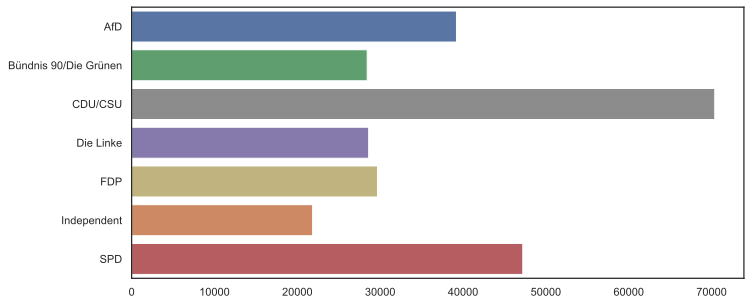

In [124]:
# Assign colors to parties
palette ={"AfD": "#4C72B0", "Bündnis 90/Die Grünen": "#55A868", 
          "SPD": "#C44E52", "Die Linke": "#8172B3", "NPD": "#937860",
         "CDU/CSU":"#8C8C8C", "FDP":"#CCB974", "Independent": "#DD8452"}

sns.countplot(y="party", data=bt_df, dodge=False, palette=palette).set(xlabel='', ylabel='')
sns.set(font_scale = 2)
sns.set(rc = {'figure.figsize':(11,5)})
sns.set_style("white")

plt.savefig('parties_bt_df.svg')

### Length of speeches per Party

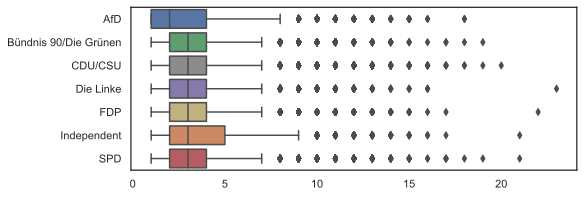

In [144]:
sns.boxplot(y="party", x="text_sents", data=bt_df, palette=palette).set(xlabel="", ylabel="")
sns.set(font_scale = 2)
sns.set(rc = {'figure.figsize':(5,3)})
sns.set_style("white")

#plt.show()
plt.savefig('length_speeches_bt_df.svg')

## Stats

### Variable Overview

In [12]:
bt_df.describe()

,Unnamed: 0,Unnamed: 0.1,text_subid,text_election_period,text_session_nr,spr_id,spr_state,paragraph_id,year,text_tokens,text_sents
count,265375.000000,265375.0,265375.000000,265375.0,265375.000000,2.653750e+05,0.0,265375.000000,265375.000000,265375.000000,265375.000000
mean,173242.365603,0.0,0.374037,19.0,123.134489,1.156423e+08,NaN,6.397302,2019.290382,59.822866,3.251116
std,102620.624799,0.0,1.424299,0.0,67.615459,9.509969e+09,NaN,6.437911,1.080075,36.507658,2.028280
min,0.000000,0.0,0.000000,19.0,1.000000,1.000000e+04,NaN,0.000000,2017.000000,5.000000,1.000000
25%,83888.500000,0.0,0.000000,19.0,63.000000,1.100403e+07,NaN,2.000000,2018.000000,31.000000,2.000000
50%,169513.000000,0.0,0.000000,19.0,124.000000,1.100435e+07,NaN,5.000000,2019.000000,53.000000,3.000000
75%,264290.500000,0.0,0.000000,19.0,182.000000,1.100476e+07,NaN,9.000000,2020.000000,80.000000,4.000000
max,351518.000000,0.0,30.000000,19.0,237.000000,1.000000e+12,NaN,138.000000,2021.000000,388.000000,23.000000


In [13]:
# Number of examples without party
len(bt_df.loc[bt_df['party'] == 'Independent' ])

21848

In [14]:
bt_df['party'].unique()

array(['AfD', 'Bündnis 90/Die Grünen', 'CDU/CSU', 'Die Linke', 'FDP',
       'Independent', 'SPD'], dtype=object)

In [15]:
len(bt_df)

265375

In [20]:
bt_df

,Unnamed: 0,Unnamed: 0.1,text_id,text_subid,text_date,text_election_period,text_session_nr,text_location,text_source,spr_id,...,spr_location_affix,spr_role_full,spr_role_short,spr_state,paragraph,paragraph_id,year,doc_text,text_tokens,text_sents
25949,33155,0,ID192915200,0,26.04.2018,19,29,Berlin,19029-data.xml,11004792.0,...,NaN,NaN,NaN,NaN,"Dabei gibt es eine Sache, die jedes Menschheit...",13,2018,"(Dabei, gibt, es, eine, Sache, ,, die, jedes, ...",38,2
27344,34892,0,ID193102900,0,15.05.2018,19,31,Berlin,19031-data.xml,11004933.0,...,NaN,NaN,NaN,NaN,"Durch mehr, schnellere, sauberere und pünktlic...",3,2018,"(Durch, mehr, ,, schnellere, ,, sauberere, und...",23,1
27345,34893,0,ID193102900,0,15.05.2018,19,31,Berlin,19031-data.xml,11004933.0,...,NaN,NaN,NaN,NaN,"Aber eine Verdoppelung? Was passiert, wenn die...",4,2018,"(Aber, eine, Verdoppelung, ?, Was, passiert, ,...",97,6
27346,34894,0,ID193102900,0,15.05.2018,19,31,Berlin,19031-data.xml,11004933.0,...,NaN,NaN,NaN,NaN,Ich verspreche Ihnen: Die AfD wird hier äußers...,5,2018,"(Ich, verspreche, Ihnen, :, Die, AfD, wird, hi...",12,1
27347,34895,0,ID193102900,0,15.05.2018,19,31,Berlin,19031-data.xml,11004933.0,...,NaN,NaN,NaN,NaN,Eine neue Welle des Ökodirigismus werden wir i...,6,2018,"(Eine, neue, Welle, des, Ökodirigismus, werden...",18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42910,54485,0,ID194406600,0,03.07.2018,19,44,Berlin,19044-data.xml,11003556.0,...,NaN,NaN,NaN,NaN,"Dies, meine Damen und Herren, ist also gut ang...",4,2018,"(Dies, ,, meine, Damen, und, Herren, ,, ist, a...",23,1
42909,54484,0,ID194406600,0,03.07.2018,19,44,Berlin,19044-data.xml,11003556.0,...,NaN,NaN,NaN,NaN,"Deshalb, liebe Kolleginnen und Kollegen, ist e...",3,2018,"(Deshalb, ,, liebe, Kolleginnen, und, Kollegen...",109,4
42908,54483,0,ID194406600,0,03.07.2018,19,44,Berlin,19044-data.xml,11003556.0,...,NaN,NaN,NaN,NaN,Die Tourismuswirtschaft ist ein echtes Schwerg...,2,2018,"(Die, Tourismuswirtschaft, ist, ein, echtes, S...",87,7
233021,309484,0,ID1921201100,0,25.02.2021,19,212,Berlin,19212-data.xml,11004605.0,...,NaN,NaN,NaN,NaN,Für die Sicherung von Arbeit und Wohlstand – e...,3,2021,"(Für, die, Sicherung, von, Arbeit, und, Wohlst...",129,8


In [17]:
len(bt_df.text_id.unique())


25022

In [22]:
bt_df.text_subid.unique()

array([ 0,  7,  2,  6,  9,  4,  8,  3,  5, 12, 10, 11, 25, 13, 20, 23,  1,
       14, 16, 18, 15, 30, 24, 26, 28, 21, 19, 17, 22], dtype=int64)

# 3. NCCR DICT

In [2]:
# Generate displacy
import spacy
from spacy import displacy
from pathlib import Path

In [3]:
nlp_full = spacy.load('de_core_news_lg')

doc1 = nlp_full('Der Mann streichelt den Hund.')

doc2 = nlp_full('Den Hund streichelt der Mann.')


In [4]:
options= {'collapse_phrases': True,  
          'font': 'computer modern',
          'arrow_stroke': 1,
         'arrow_width': 5}

In [52]:
svg = displacy.render(doc1, style="dep", options=options, jupyter=False)
output_path = Path("./images/dependency_ex_1.svg") # you can keep there only "dependency_plot.svg" if you want to save it in the same folder where you run the script 
output_path.open("w", encoding="utf-8").write(svg)


2213

In [53]:
svg = displacy.render(doc2, style="dep", options=options, jupyter=False)
output_path = Path("./images/dependency_ex_2.svg") # you can keep there only "dependency_plot.svg" if you want to save it in the same folder where you run the script 
output_path.open("w", encoding="utf-8").write(svg)


2213

In [44]:
doc3 =  nlp_full('Der Bundesrat hat eine Regulierung in der Schweiz verhindert.')

In [47]:
options= {'collapse_phrases': True,
          'compact':True,
          'font': 'computer modern',
          'arrow_stroke': 1,
          'word_spacing': 50,
          'distance': 80,
         'arrow_width': 5}

In [50]:
svg = displacy.render(doc3, style="dep", options=options, jupyter=True)
output_path = Path("./images/dependency_ex_3.svg") # you can keep there only "dependency_plot.svg" if you want to save it in the same folder where you run the script 
output_path.open("w", encoding="utf-8").write(svg)


TypeError: write() argument must be str, not None

In [51]:
segment = doc3

# Define individual components
VERBS = ['VERB', 'AUX']
VERBCOMPONENTS = ['svp']
SUBJECTS = ['sb', 'sbp']
OBJECTS = ['oa', 'og', 'da', 'pd']  # oc,?
NEGATIONS = ['ng']

# Generate empty dict list
triples_dict_list = []

# Etract fullverb tokens
verbs = [token for token in segment if token.pos_ in VERBS]


for verb in verbs:

    # # only for debugging
    lemmas = []  ##
    current_sent = verb.sent  ##
    for token in current_sent:  ##
        lemmas.append((token.lemma_.lower(), token.pos_, token.dep_, token.head.text))  ##

    # Create empty list for components
    verb_list = []
    verb_comp_list = []
    subj_list = []
    obj_list = []
    neg_list = []

    # Extract current fullverb
    verb_list.append(verb.lemma_.lower())

    # Iterate over verb dependents
    for child in verb.children:

        # Extract separable verb prefix
        if child.dep_ in VERBCOMPONENTS:
            verb_comp_list.append(child.lemma_.lower())

        # Extract subject
        if child.dep_ in SUBJECTS:
            subj_list.append(child.text.lower())

        # Extract object
        elif child.dep_ in OBJECTS:
            obj_list.append(child.lemma_.lower())

        # Extract negation
        elif child.dep_ in NEGATIONS:
            neg_list.append(child.lemma_.lower())

        # Extract oc object for tuples without object
        elif child.dep_ == 'oc':
            if not obj_list:
                obj_list.append(child.lemma_.lower())

    # if lists are empty, return None
    if (not verb_list) & (not verb_comp_list) & (not subj_list) & (not obj_list) & (not neg_list):
        triples_dict = None

    # Else, return content
    else:
        triples_dict = {'subject': subj_list,
                        'verb': verb_list,
                        'verb_prefix': verb_comp_list,
                        'object': obj_list,
                        'negation': neg_list}

    # Generate list with dict for each verb in Segment
    triples_dict_list.append(triples_dict)

print(triples_dict_list)

[{'subject': ['bundesrat'], 'verb': ['haben'], 'verb_prefix': [], 'object': ['verhindern'], 'negation': []}, {'subject': [], 'verb': ['verhindern'], 'verb_prefix': [], 'object': ['regulierung'], 'negation': []}]
